In [11]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import matplotlib.pyplot as plt


In [12]:

# Load the data from the CSV file
data = pd.read_csv("NYNJ_zipcode_population.csv")

# Extract the clustering attributes
attributes = data[['Low_income', 'Total_Pop']]

# Perform hierarchical clustering with single linkage
linkage_matrix = linkage(attributes, method='single')

# Determine clusters based on the linkage matrix
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add the cluster labels to the original data
data['Cluster'] = cluster_labels

# Display the members of each cluster
clustered_data = {}
for cluster_num in range(1, num_clusters + 1):
    cluster_members = data[data['Cluster'] == cluster_num]
    clustered_data[f'Cluster {cluster_num}'] = cluster_members[['zipcode', 'Low_income', 'Total_Pop']].copy()

    print(f"\nCluster {cluster_num} members:")
    print(cluster_members[['zipcode', 'Low_income', 'Total_Pop']])



Cluster 1 members:
     zipcode  Low_income  Total_Pop
0       7002       35.31      31780
1       7029       38.40       9140
2       7030       12.60      29050
3       7032       38.40      18880
4       7047       42.16      29200
..       ...         ...        ...
551    12603       29.35      20990
552    12729       37.50        800
553    12746       37.50        560
554    12771       40.22       6290
555    12780       34.55       1100

[549 rows x 3 columns]

Cluster 2 members:
     zipcode  Low_income  Total_Pop
293    11236       40.17      47920
310    11368       57.43      48530
320    11385       40.25      48790

Cluster 3 members:
     zipcode  Low_income  Total_Pop
278    11220       67.01      53900
284    11226       44.86      52070
298    11355       68.58      50960
314    11373       53.82      50870


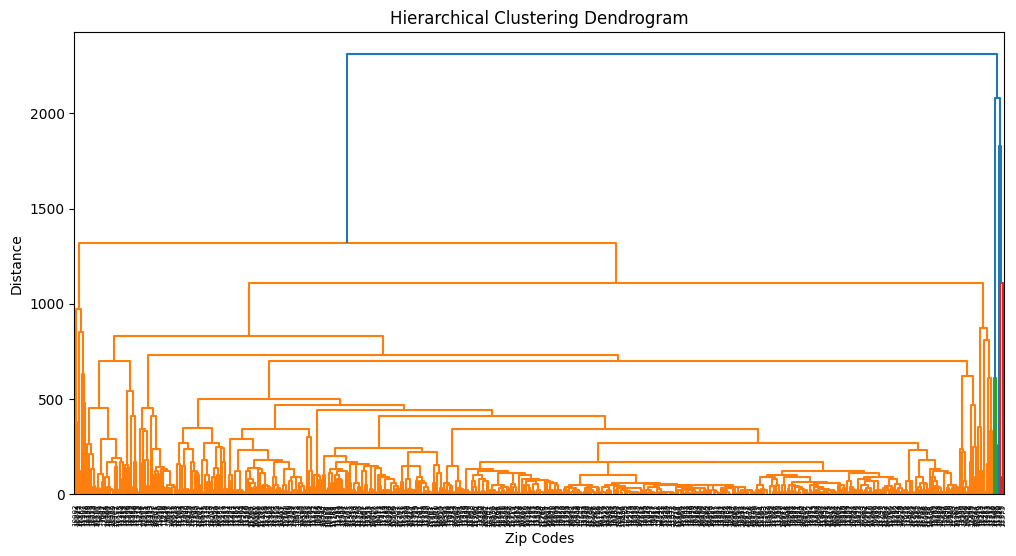

In [13]:

# Visualize the dendrogram for hierarchical clustering
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage_matrix, labels=data['zipcode'].tolist(), leaf_rotation=90)
plt.xlabel('Zip Codes')
plt.ylabel('Distance')
plt.show()


In [14]:

# Check for unusual zip code (outlier)
outliers = data[data['Cluster'] == 3]  # Assuming the unusual zip codes are in cluster 3
unusual_zip_code = outliers.loc[outliers['Total_Pop'].idxmax()]['zipcode']
print(f"\nUnusual Zip Code: {unusual_zip_code}")



Unusual Zip Code: 11220


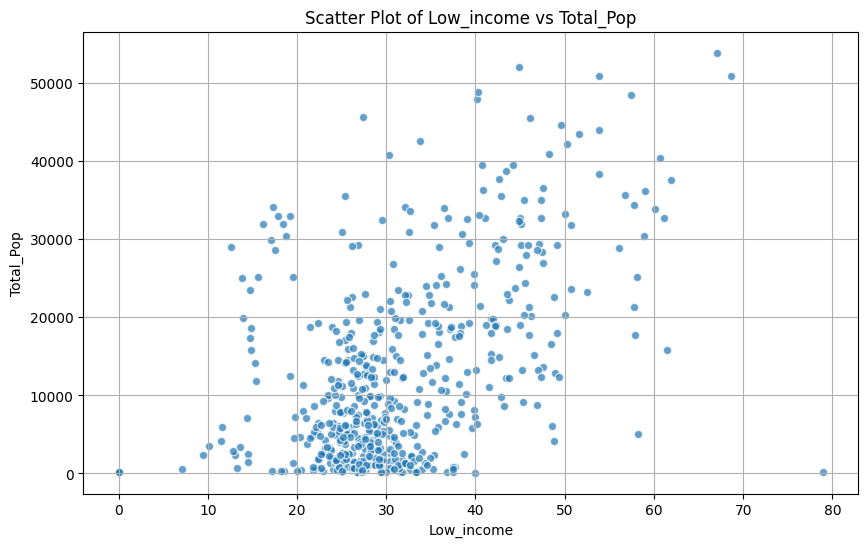

In [16]:
## checking that clusters look alright

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("NYNJ_zipcode_population.csv")

# Scatter plot without cluster coloring
plt.figure(figsize=(10, 6))
plt.scatter(data['Low_income'], data['Total_Pop'], alpha=0.7, edgecolors='w')
plt.title('Scatter Plot of Low_income vs Total_Pop')
plt.xlabel('Low_income')
plt.ylabel('Total_Pop')
plt.grid(True)
plt.show()

